# Capstone Part Two |  Additional EDA, Data Cleaning, and Feature Engineering | <br/> Gino Sacco

This data contains the plays from 2019 which wasn't included in the main dataset found on Kaggle. This data was found on github and was uploaded by user ryurko. The data was scraped from NFL.com using NFLscarpR. The repository can be found at https://github.com/ryurko/nflscrapR-data

In [1]:
import pandas as pd
import numpy as np
import io
import requests
url="https://raw.githubusercontent.com/ryurko/nflscrapR-data/master/play_by_play_data/regular_season/reg_pbp_2019.csv"
s=requests.get(url).content
c=pd.read_csv(io.StringIO(s.decode('utf-8')))

pd.options.display.max_columns = 255

C:\Users\ginos\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (167,168,169,170,175,176,179,180,183,184,189,190,191,192,195,196,204,205,206,219,220,221,222,223,224,227,228,232,233,234,239,241,242) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
## save the data to a CSV file

c.to_csv('data/capstone/NFL_2019v1.csv', index=False)

In [3]:
## The data appears to be in the same format as the Kaggle dataset. This is great!

nfl = pd.read_csv('data/capstone/NFL_2019v1.csv')
print(nfl.shape)
nfl.head()

(45546, 256)


,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,comp_air_wpa,comp_yac_wpa,total_home_comp_air_wpa,total_away_comp_air_wpa,total_home_comp_yac_wpa,total_away_comp_yac_wpa,total_home_raw_air_wpa,total_away_raw_air_wpa,total_home_raw_yac_wpa,total_away_raw_yac_wpa,punt_blocked,first_down_rush,first_down_pass,first_down_penalty,third_down_converted,third_down_failed,fourth_down_converted,fourth_down_failed,incomplete_pass,touchback,interception,punt_inside_twenty,punt_in_endzone,punt_out_of_bounds,punt_downed,punt_fair_catch,kickoff_inside_twenty,...,kickoff_downed,kickoff_fair_catch,fumble_forced,fumble_not_forced,fumble_out_of_bounds,solo_tackle,safety,penalty,tackled_for_loss,fumble_lost,own_kickoff_recovery,own_kickoff_recovery_td,qb_hit,rush_attempt,pass_attempt,sack,touchdown,pass_touchdown,rush_touchdown,return_touchdown,extra_point_attempt,two_point_attempt,field_goal_attempt,kickoff_attempt,punt_attempt,fumble,complete_pass,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,pass_defense_1_pla

In [4]:
## Check out unique plays per team across the 2019 season

print(nfl['home_team'].value_counts())

TB     1493
CAR    1488
MIA    1485
ATL    1480
LA     1469
DET    1466
DAL    1464
ARI    1457
SF     1450
SEA    1448
PHI    1444
NYG    1441
CIN    1429
CHI    1427
CLE    1426
HOU    1414
NYJ    1414
NO     1412
IND    1405
PIT    1405
GB     1404
NE     1403
BUF    1401
TEN    1400
WAS    1397
DEN    1391
KC     1384
OAK    1382
BAL    1374
JAX    1368
MIN    1367
LAC    1358
Name: home_team, dtype: int64


In [5]:
## For consistency, and to differentiate the 2 LA based teams, I will change LA to LAR (Rams)

nfl.replace(['LA'], ['LAR'], inplace=True)

## Drop all play that aren't pass or runs

nfl = nfl[(nfl.down.isin(range(1,5))) & 
     (nfl.play_type == 'run') | (nfl.down.isin(range(1,5))) & (nfl.play_type == 'pass')]

nfl.shape


(31975, 256)

The following process is to transform the data to be consistent with the previous dataset containing plays from 2009-2018.

In [6]:
## Only use features that would be known prior to the play occuring

df = nfl[['game_date', 'game_id', 'posteam','defteam','side_of_field',
          'posteam_type','yardline_100', 'drive','quarter_seconds_remaining',
          'qtr','down','ydstogo','play_type','score_differential',
          'shotgun','no_huddle', 'posteam_timeouts_remaining',
          'defteam_timeouts_remaining']]

print(df.shape)
df.sample(3)

(31975, 18)


,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,play_type,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining
34065,2019-12-02,2019120200,SEA,MIN,MIN,home,49.0,8,230.0,2,2.0,6,pass,-7.0,1,0,3.0,3.0
2716,2019-09-09,2019090901,DEN,OAK,DEN,away,75.0,2,532.0,1,1.0,10,run,-7.0,0,0,3.0,3.0
4954,2019-09-15,2019091510,OAK,KC,OAK,home,72.0,21,663.0,4,2.0,3,pass,-18.0,1,1,3.0,2.0


In [7]:
## Check for null values

df.isnull().sum()

game_date                     0
game_id                       0
posteam                       0
defteam                       0
side_of_field                 0
posteam_type                  0
yardline_100                  0
drive                         0
quarter_seconds_remaining     0
qtr                           0
down                          0
ydstogo                       0
play_type                     0
score_differential            0
shotgun                       0
no_huddle                     0
posteam_timeouts_remaining    0
defteam_timeouts_remaining    0
dtype: int64

In [8]:
## Set possession team to binary home = 1, away = 0

posteam = {'home': 1,'away': 0}

df.posteam_type = [posteam[item] for item in df.posteam_type]
df.head()

C:\Users\ginos\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,play_type,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining
1,2019-09-05,2019090500,GB,CHI,GB,0,75.0,1,900.0,1,1.0,10,run,0.0,0,0,3.0,3.0
2,2019-09-05,2019090500,GB,CHI,GB,0,75.0,1,873.0,1,2.0,10,pass,0.0,0,0,3.0,3.0
3,2019-09-05,2019090500,GB,CHI,GB,0,75.0,1,825.0,1,3.0,10,pass,0.0,1,0,3.0,3.0
6,2019-09-05,2019090500,CHI,GB,CHI,1,52.0,2,753.0,1,1.0,10,run,0.0,1,0,3.0,3.0
7,2019-09-05,2019090500,CHI,GB,GB,1,47.0,2,718.0,1,2.0,5,pass,0.0,1,0,3.0,3.0


In [9]:
## Add new features field goal range and red zone

yards = df['yardline_100']
field_goal_range = []
red_zone = []

for yard in yards:
    if yard <= 35:
        field_goal_range.append(1)
        if yard <= 20:
            red_zone.append(1)
        else:
            red_zone.append(0)
    else:
        field_goal_range.append(0)
        red_zone.append(0)
        
df['field_goal_range'] = field_goal_range
df['red_zone'] = red_zone

df.sample(10)

C:\Users\ginos\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ginos\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,play_type,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone
5545,2019-09-16,2019091600,CLE,NYJ,NYJ,0,30.0,3,385.0,1,3.0,5,pass,3.0,1,0,3.0,3.0,1,0
11446,2019-10-06,2019100600,JAX,CAR,CAR,0,46.0,8,8.0,1,2.0,7,pass,-7.0,1,0,3.0,3.0,0,0
41968,2019-12-22,2019122200,DEN,DET,DEN,1,57.0,13,107.0,3,3.0,7,pass,-4.0,1,0,3.0,3.0,0,0
37597,2019-12-15,2019121507,HOU,TEN,HOU,0,77.0,3,419.0,1,1.0,10,run,0.0,1,0,3.0,3.0,0,0
42119,2019-12-22,2019122213,SEA,ARI,SEA,1,66.0,15,857.0,3,2.0,10,pass,-10.0,1,0,3.0,3.0,0,0
2517,2019-09-08,2019090812,PIT,NE,NE,0,32.0,21,36.0,4,4.0,2,pass,-30.0,1,0,2.0,2.0,1,0
44072,2019-12-29,2019122912,ATL,TB,TB,0,19.0,18,780.0,4,3.0,1,run,-5.0,0,0,3.0,3.0,1,1
28150,2019-11-17,2019111708,SF,ARI,ARI,1,35.0,19,65.0,4,2.0,10,pass,-3.0,1,0,2.0,3.0,1,0
2708,2019-09-09,2019090901,OAK,DEN,DEN,1,47.0,1,706.0,1,1.0,10,pass,0.0,0,0,3.0,3.0,0,0
9431,2019-09-29,2019092904,HOU,CAR,HOU,1,61.0,4,68.0,1,1.0,10,pass,-3.0,1,0,3.0,3.0,0,0


In [10]:
## Change the target play_type column to binary 1 for pass 0 for run

play = {'pass': 1,'run': 0}

df.play_type = [play[item] for item in df.play_type]
df.head()

,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,play_type,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone
1,2019-09-05,2019090500,GB,CHI,GB,0,75.0,1,900.0,1,1.0,10,0,0.0,0,0,3.0,3.0,0,0
2,2019-09-05,2019090500,GB,CHI,GB,0,75.0,1,873.0,1,2.0,10,1,0.0,0,0,3.0,3.0,0,0
3,2019-09-05,2019090500,GB,CHI,GB,0,75.0,1,825.0,1,3.0,10,1,0.0,1,0,3.0,3.0,0,0
6,2019-09-05,2019090500,CHI,GB,CHI,1,52.0,2,753.0,1,1.0,10,0,0.0,1,0,3.0,3.0,0,0
7,2019-09-05,2019090500,CHI,GB,GB,1,47.0,2,718.0,1,2.0,5,1,0.0,1,0,3.0,3.0,0,0


In [11]:
## Change side_of_field column to binary 1 if on their side of field 0 if on opponents side of field

df['side_of_field'] = np.where(df['side_of_field'] == df['posteam'], 1, 0)

df.sample(5)

C:\Users\ginos\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,play_type,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone
29727,2019-11-24,2019112404,CLE,MIA,0,1,11.0,18,460.0,4,2.0,10,0,14.0,0,0,3.0,2.0,1,1
40723,2019-12-22,2019122209,PIT,NYJ,1,0,55.0,14,749.0,3,3.0,5,1,0.0,1,0,3.0,3.0,0,0
15406,2019-10-13,2019101308,LAR,SF,0,1,24.0,8,354.0,2,1.0,10,0,0.0,0,0,2.0,2.0,1,0
23458,2019-11-03,2019110309,CLE,DEN,1,0,61.0,4,258.0,1,1.0,10,0,-7.0,1,0,3.0,3.0,0,0
9687,2019-09-29,2019092903,DET,KC,1,1,53.0,16,516.0,3,1.0,10,0,-7.0,0,0,3.0,2.0,0,0


In [12]:
## move target column to end of dataframe

target = df['play_type']
df = df.drop(columns=['play_type'])
df['play_type'] = target
print(df.shape)
df.head()

(31975, 20)


,game_date,game_id,posteam,defteam,side_of_field,posteam_type,yardline_100,drive,quarter_seconds_remaining,qtr,down,ydstogo,score_differential,shotgun,no_huddle,posteam_timeouts_remaining,defteam_timeouts_remaining,field_goal_range,red_zone,play_type
1,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,900.0,1,1.0,10,0.0,0,0,3.0,3.0,0,0,0
2,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,873.0,1,2.0,10,0.0,0,0,3.0,3.0,0,0,1
3,2019-09-05,2019090500,GB,CHI,1,0,75.0,1,825.0,1,3.0,10,0.0,1,0,3.0,3.0,0,0,1
6,2019-09-05,2019090500,CHI,GB,1,1,52.0,2,753.0,1,1.0,10,0.0,1,0,3.0,3.0,0,0,0
7,2019-09-05,2019090500,CHI,GB,0,1,47.0,2,718.0,1,2.0,5,0.0,1,0,3.0,3.0,0,0,1


In [13]:
## Double check the shape of my data

df.shape

(31975, 20)

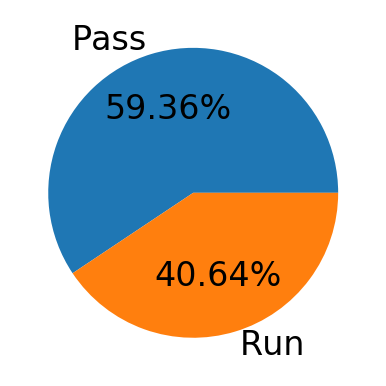

In [14]:
## Check the distribution of the data for the 2019 season

import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib as mpl
mpl.rcParams['font.size'] = 20
mpl.rcParams['figure.dpi'] = 120

freq = df['play_type'].value_counts()

plt.pie(freq, labels = ('Pass','Run'), autopct='%.2f%%')
plt.show()

Very similar distribution off play calling throughout the 2019 season with the previous 10 seasons I looked at previosly.

In [15]:
## save 2019 clean dataset

df.to_csv('data/capstone/NFL_2019_clean.csv', index=False)